# 0.4.0 Clustering in Real World

In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

from scipy.cluster.vq import kmeans, vq

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.4.2 Extract RGB values from image

In [4]:
# Read batman image and print dimensions
batman_image = img.imread(path.data_external_dir('batman.jpg'))
print(batman_image.shape)

(169, 269, 3)


In [5]:
r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

## 0.4.3 How many dominant colors?

In [6]:
batman_df = pd.read_csv(path.data_raw_dir("batman_df.csv"), sep=',')
print(batman_df.info())
batman_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   red           5130 non-null   int64  
 1   blue          5130 non-null   int64  
 2   green         5130 non-null   int64  
 3   scaled_red    5130 non-null   float64
 4   scaled_blue   5130 non-null   float64
 5   scaled_green  5130 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 240.6 KB
None


,red,blue,green,scaled_red,scaled_blue,scaled_green
0,10,15,9,0.172,0.284,0.158
1,14,49,36,0.240,0.928,0.630
2,55,125,103,0.944,2.368,1.804
3,35,-127,98,0.601,-2.406,1.716
4,38,-122,101,0.652,-2.311,1.769


In [7]:
distortions = []
num_clusters = range(1, 7)

In [8]:
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

In [9]:
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

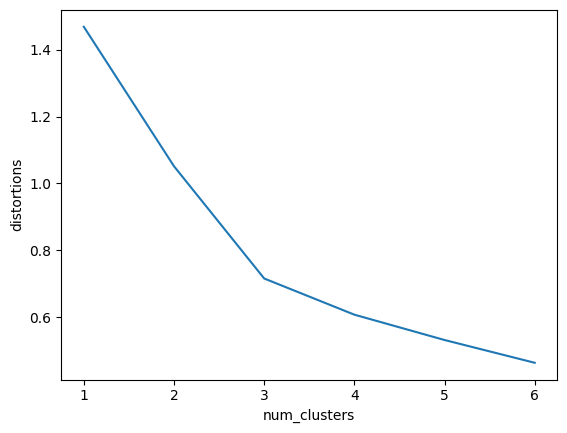

In [10]:
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

## 0.4.4 Display dominant colors

In [11]:
# batman_df = pd.read_csv(path.data_raw_dir("batman_df.csv"), sep=',')
# print(batman_df.info())
# batman_df.head()

In [12]:
# Generate cluster centers
cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

In [13]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

In [14]:
colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255,
    ))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


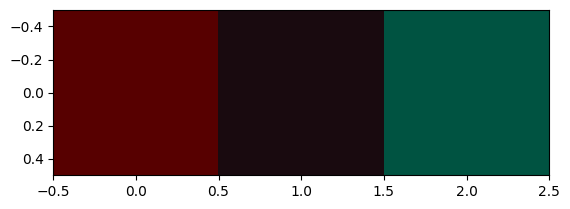

In [15]:
# Display colors of cluster centers
plt.imshow([colors])
plt.show()

## 0.4.6 TF-IDF of movie plots


In [39]:
file = open(path.data_external_dir("plot.txt"), encoding="utf8")
plots = file.readlines()

In [40]:
def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [41]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer=remove_noise)

In [42]:
# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

## 0.4.7 Top terms in movie clusters

In [44]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

In [45]:
# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

In [46]:
for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['her', 'she', 'him']
['him', 'an', 'they']


## 0.4.9 Basic checks on clusters


In [ ]:
print('ok_')

ok_
